# Jamboree Education - Linear Regression Case_Study

# About Jamboree

* Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
* They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. 
* This feature estimates the chances of graduate admission from an Indian perspective. 

# Business Problem

* Jamboree needs help in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. 
* It will also help predict one's chances of admission given the rest of the variables.

# Dataset



Column Profiling:


* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)


In [1]:
# Analysis
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df=pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [34]:
# Dropping Serial No. Column
df.drop(['Serial No.'],axis=1,inplace=True)

In [38]:
df.shape

(500, 8)

In [35]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit'}, inplace = True)

In [27]:
df.rename(columns = {'LOR ':'LOR'}, inplace = True)

In [36]:
#number of unique values in our data
for i in df.columns:
    print(i,":", df[i].nunique())

GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR : 9
CGPA : 184
Research : 2
Chance of Admit : 61


In [37]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Observations:

* There are no Missing Values in given data.
* Dropped Serial no column because its not required for model.
* Types of Variables:
    * Numerical: GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
* total of 5 unique ratings are present in provided data.

# Univariate Analysis

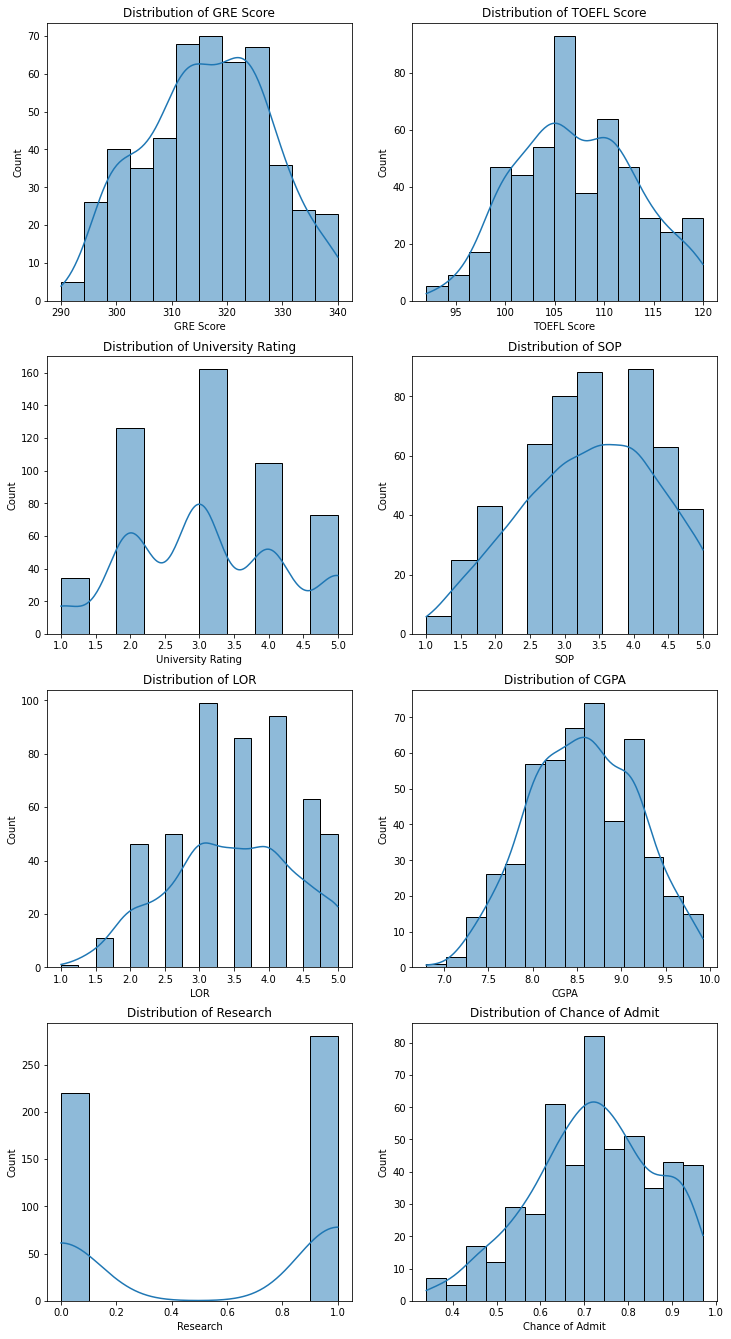

In [41]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.9)

sns.histplot(data=df, x="GRE Score", kde=True, ax=axis[0,0])
axis[0,0].set_title('Distribution of GRE Score')
sns.histplot(data=df, x="TOEFL Score", kde=True, ax=axis[0,1])
axis[0,1].set_title('Distribution of TOEFL Score')
sns.histplot(data=df, x="University Rating", kde=True, ax=axis[1,0])
axis[1,0].set_title('Distribution of University Rating')
sns.histplot(data=df, x="SOP", kde=True, ax=axis[1,1])
axis[1,1].set_title('Distribution of SOP')
sns.histplot(data=df, x="LOR", kde=True, ax=axis[2,0])
axis[2,0].set_title('Distribution of LOR')
sns.histplot(data=df, x="CGPA", kde=True, ax=axis[2,1])
axis[2,1].set_title('Distribution of CGPA')
sns.histplot(data=df, x="Research", kde=True, ax=axis[3,0])
axis[3,0].set_title('Distribution of Research')
sns.histplot(data=df, x="Chance of Admit", kde=True, ax=axis[3,1])
axis[3,1].set_title('Distribution of Chance of Admit')
plt.show()

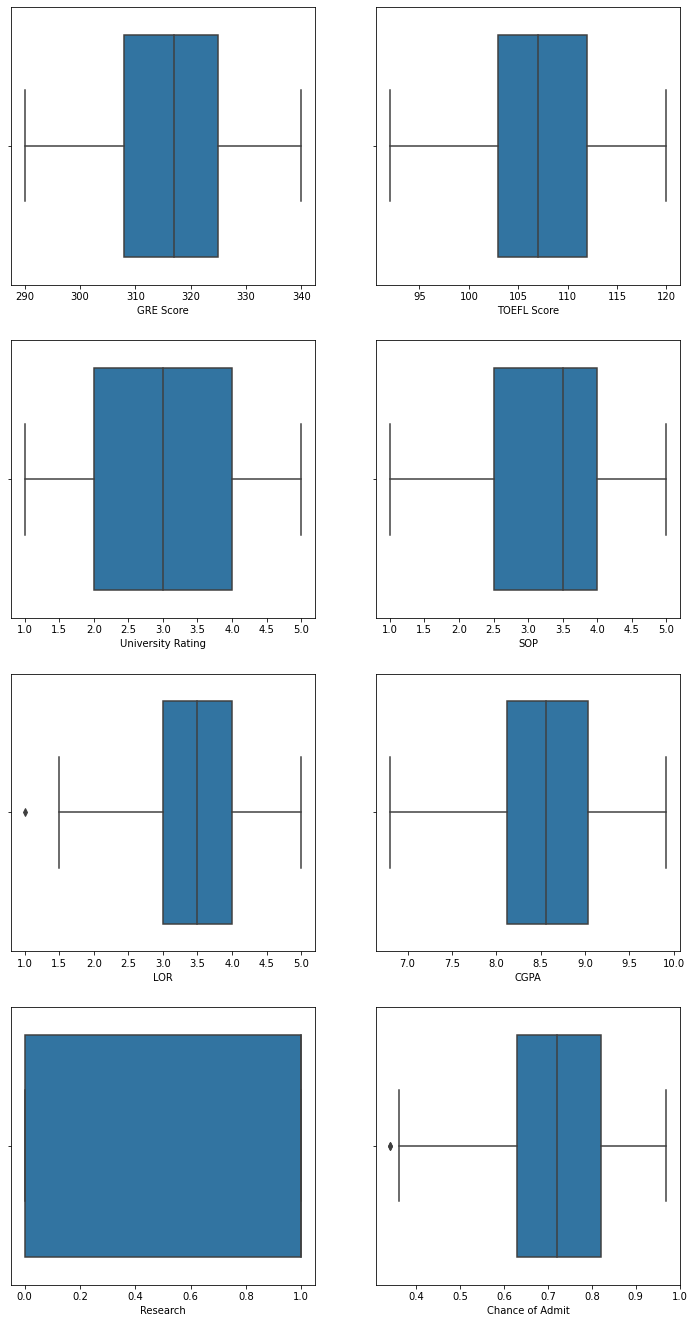

In [43]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.9)

sns.boxplot(data=df, x="GRE Score", ax=axis[0,0])
sns.boxplot(data=df, x="TOEFL Score", ax=axis[0,1])
sns.boxplot(data=df, x="University Rating", ax=axis[1,0])
sns.boxplot(data=df, x="SOP", ax=axis[1,1])
sns.boxplot(data=df, x="LOR", ax=axis[2,0])
sns.boxplot(data=df, x="CGPA", ax=axis[2,1])
sns.boxplot(data=df, x="Research", ax=axis[3,0])
sns.boxplot(data=df, x="Chance of Admit", ax=axis[3,1])
plt.show()

# Observations:

* No Outliers are present in provided Data.
* According to plots we can say that average GRE score of a candiate is around 315-320.
* According to plots we can say that average TOEFL score of a candiate is around 105-110.
* Average Chance of Admission is around 70%.
* More universities of rating 3 are present.

# Bivariate Analysis

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

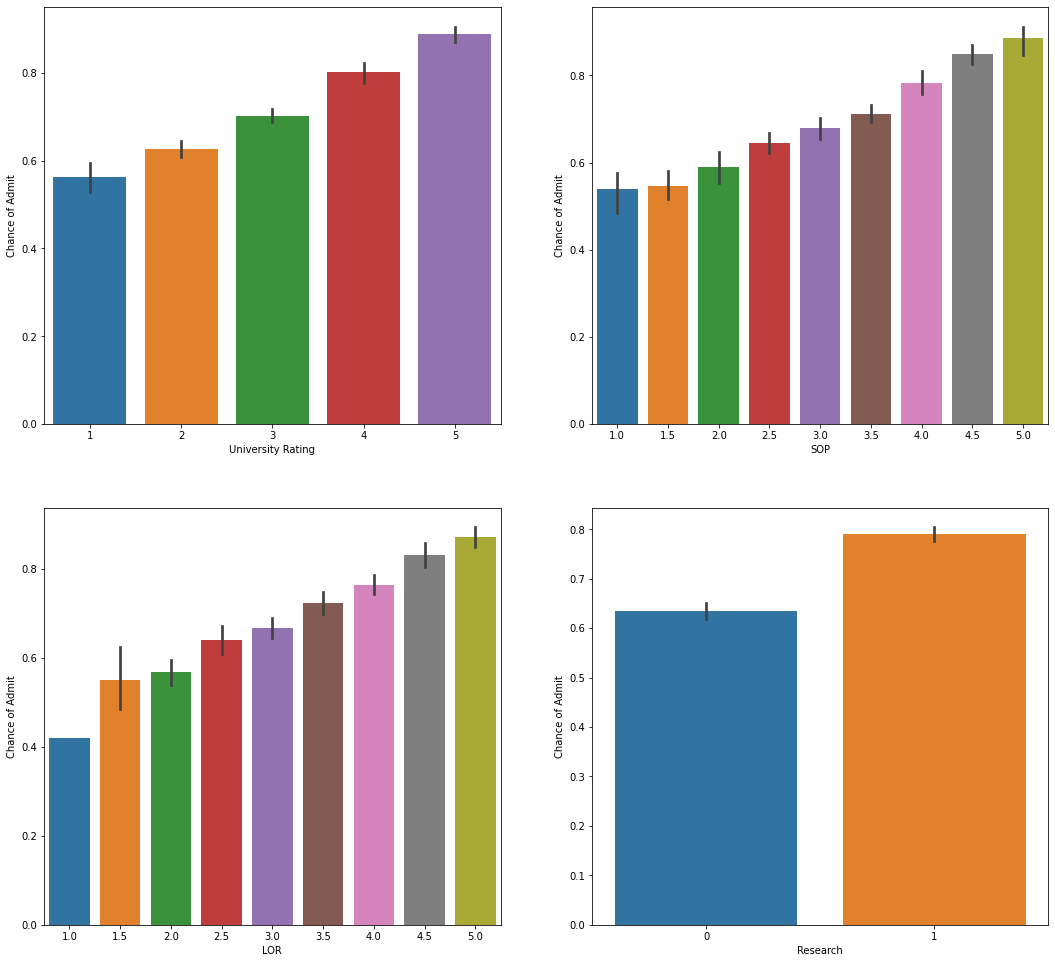

In [51]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.4)
s
sns.barplot(x='University Rating', y='Chance of Admit', data=df, ax=axis[0,0])
sns.barplot(x='SOP', y='Chance of Admit', data=df, ax=axis[0,1])
sns.barplot(x='LOR', y='Chance of Admit', data=df, ax=axis[1,0])
sns.barplot(x='Research', y='Chance of Admit', data=df, ax=axis[1,1])

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit'>

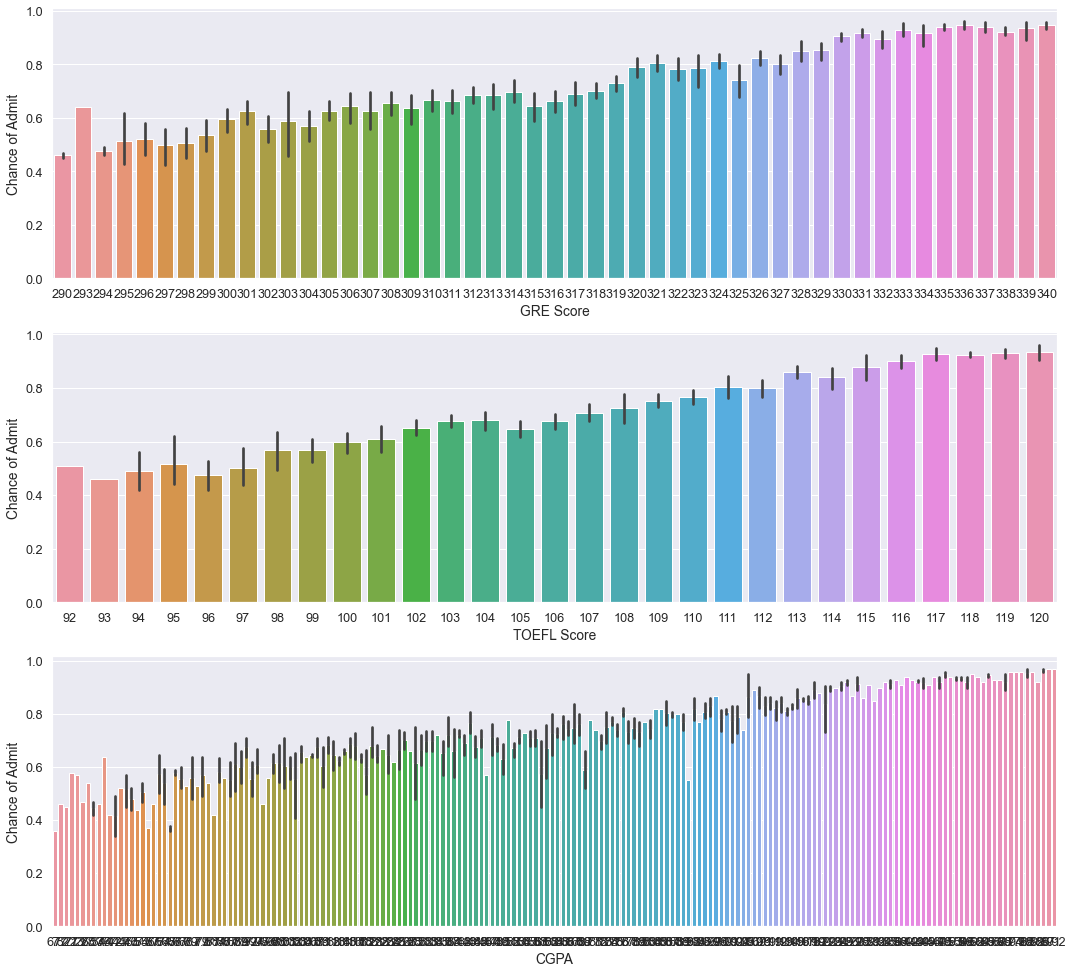

In [89]:
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(18, 10))
fig.subplots_adjust(top=1.4)

sns.barplot(x='GRE Score', y='Chance of Admit', data=df, ax=axis[0])
sns.barplot(x='TOEFL Score', y='Chance of Admit', data=df, ax=axis[1])
sns.barplot(x='CGPA', y='Chance of Admit', data=df, ax=axis[2])

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

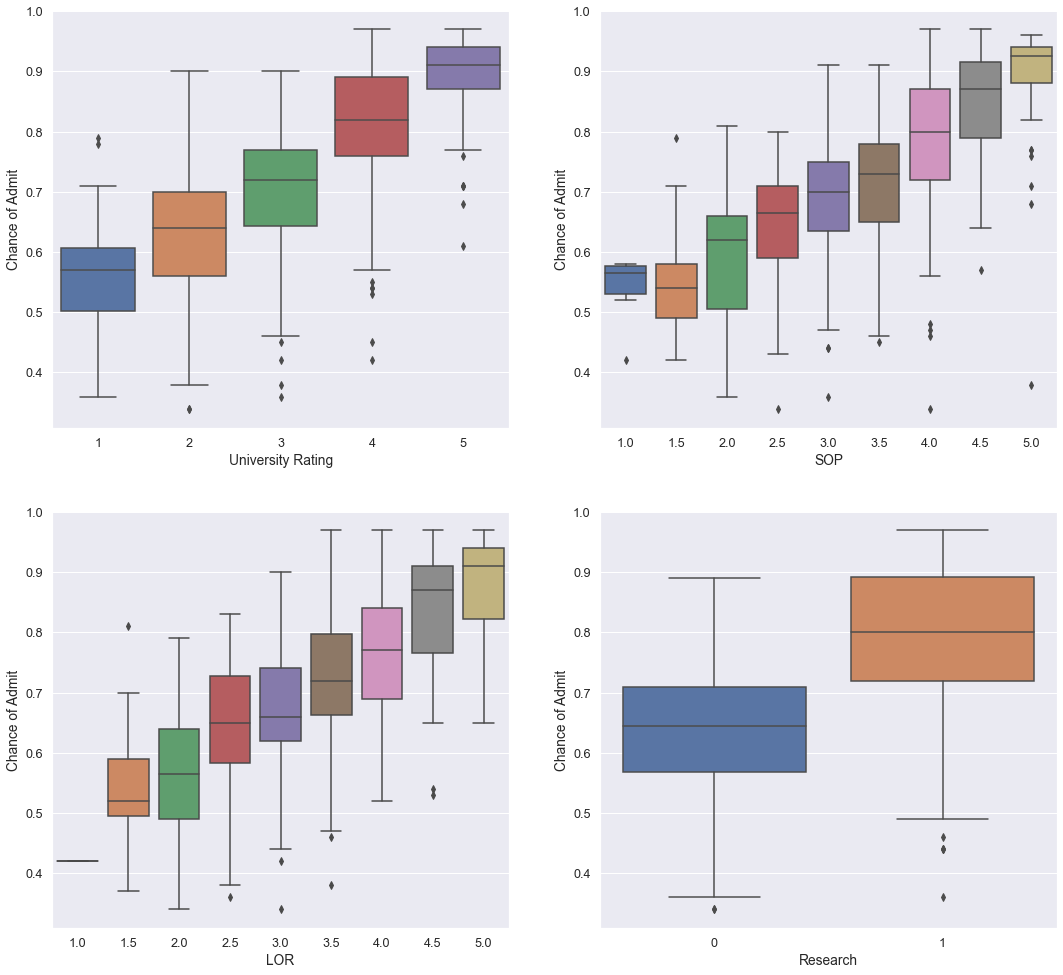

In [84]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.4)

sns.boxplot(x='University Rating', y='Chance of Admit', data=df, ax=axis[0,0])
sns.boxplot(x='SOP', y='Chance of Admit', data=df, ax=axis[0,1])
sns.boxplot(x='LOR', y='Chance of Admit', data=df, ax=axis[1,0])
sns.boxplot(x='Research', y='Chance of Admit', data=df, ax=axis[1,1])

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit'>

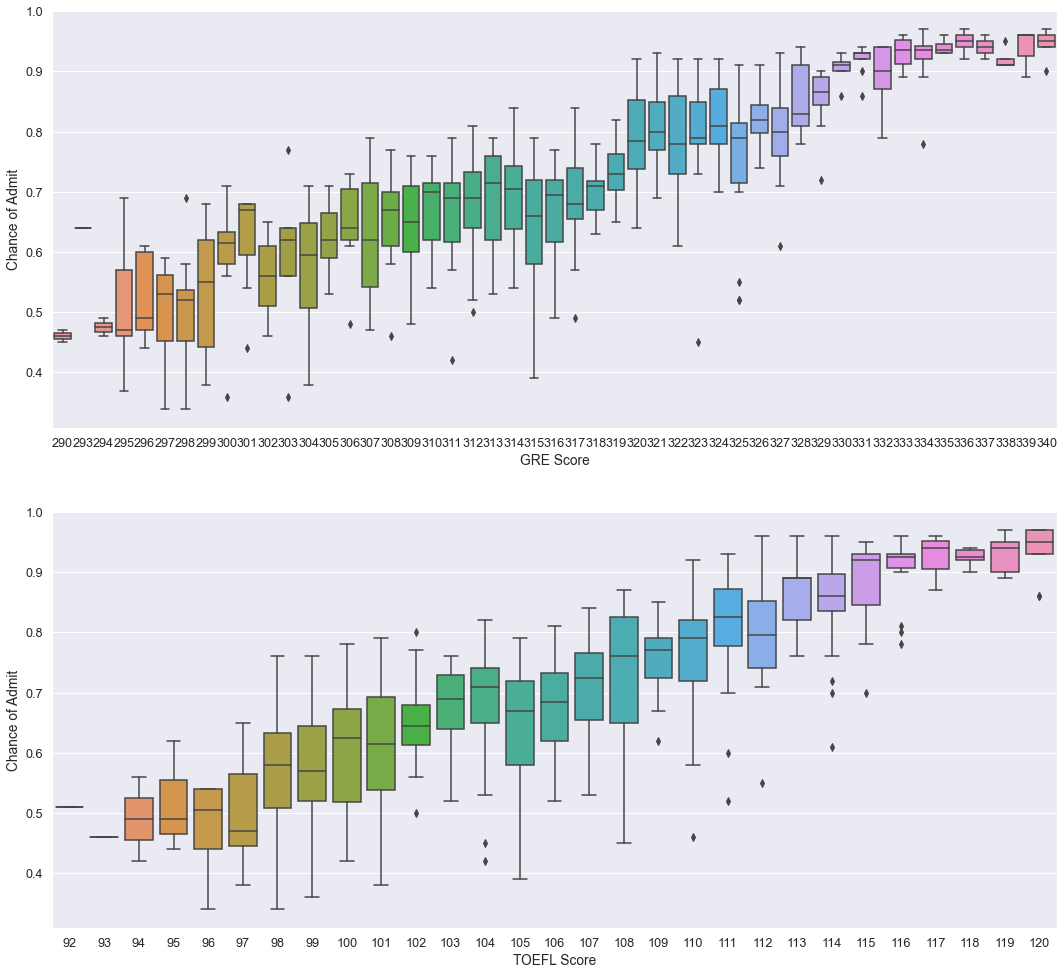

In [90]:
fig, axis = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
fig.subplots_adjust(top=1.4)

sns.boxplot(x='GRE Score', y='Chance of Admit', data=df, ax=axis[0])
sns.boxplot(x='TOEFL Score', y='Chance of Admit', data=df, ax=axis[1])

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

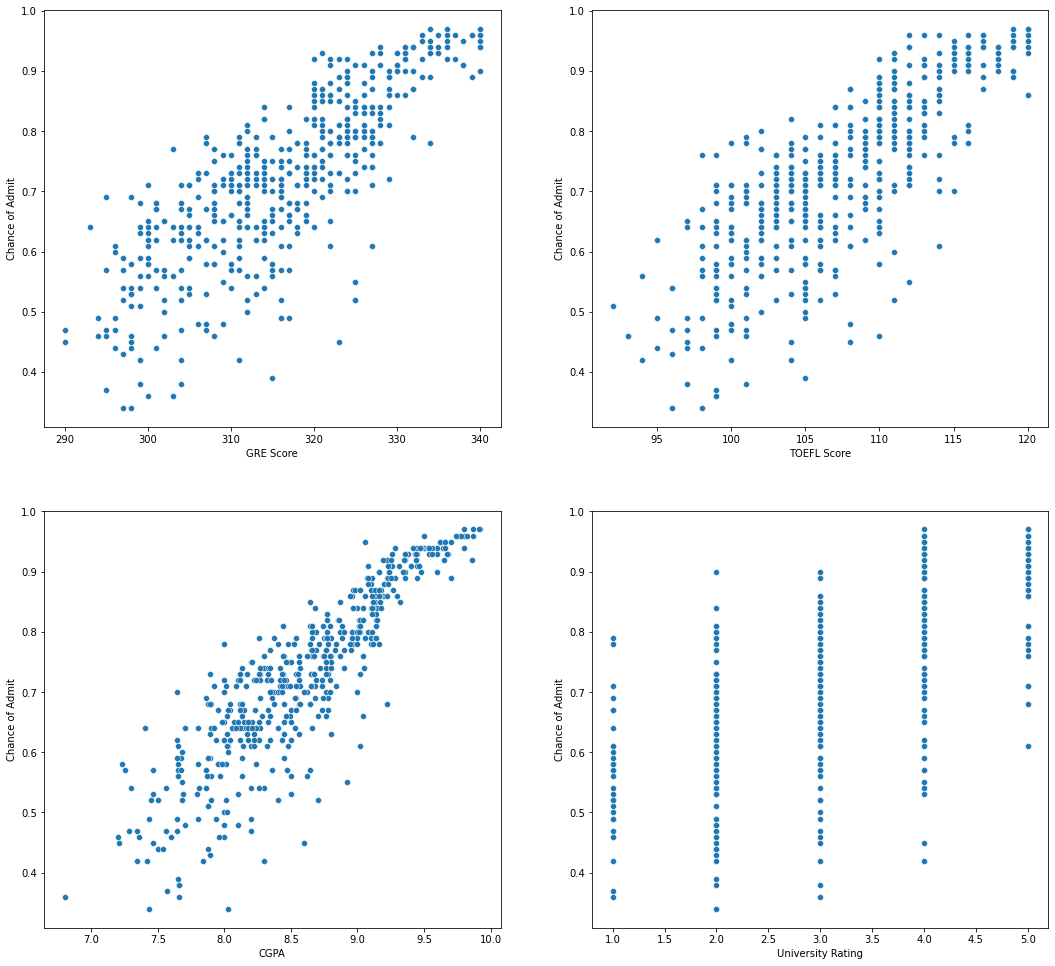

In [77]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.4)

sns.scatterplot(x='GRE Score', y='Chance of Admit', data=df, ax=axis[0,0])
sns.scatterplot(x='TOEFL Score', y='Chance of Admit', data=df, ax=axis[0,1])
sns.scatterplot(x='CGPA', y='Chance of Admit',  data=df, ax=axis[1,0])
sns.scatterplot(x='University Rating', y='Chance of Admit', data=df, ax=axis[1,1])

# Observations:

* If SOP and LOR is high then chance of admit is very high.
* If a candiate has research work then chance of Admission is also high.
* GRE and TOEFL score also decices the chance of Admission.
* seems like high university rating has high chance of admission.

# MultiVariate Analysis

In [80]:
## correlation matrix for heat map
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

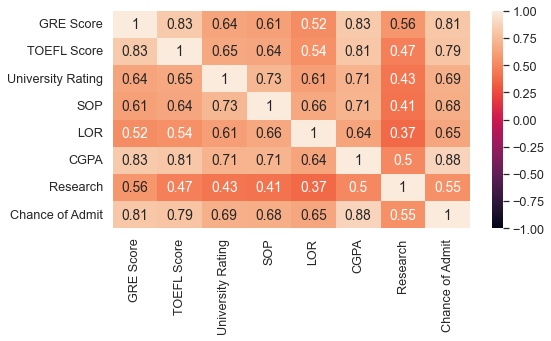

In [81]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1)

In [82]:
## spearman correlation matrix for heat map, used for better understanding 
df.corr('spearman')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.823853,0.643423,0.620688,0.514352,0.829251,0.578487,0.822201
TOEFL Score,0.823853,1.000000,0.645533,0.644715,0.523434,0.809485,0.474540,0.793634
University Rating,0.643423,0.645533,1.000000,0.729399,0.602319,0.703333,0.435351,0.703742
SOP,0.620688,0.644715,0.729399,1.000000,0.662653,0.717384,0.409088,0.702799
LOR,0.514352,0.523434,0.602319,0.662653,1.000000,0.639563,0.376166,0.643627
CGPA,0.829251,0.809485,0.703333,0.717384,0.639563,1.000000,0.509264,0.888786
Research,0.578487,0.474540,0.435351,0.409088,0.376166,0.509264,1.000000,0.565715
Chance of Admit,0.822201,0.793634,0.703742,0.702799,0.643627,0.888786,0.565715,1.000000


<AxesSubplot:>

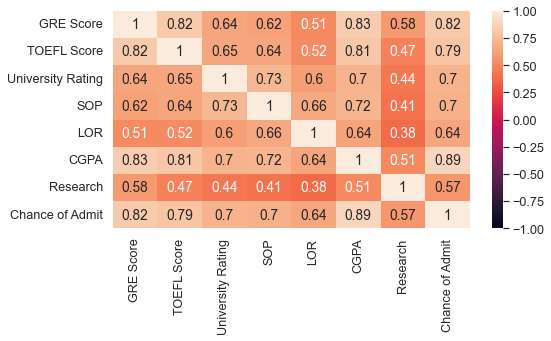

In [83]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(df.corr('spearman'),annot=True,vmin=-1, vmax=1)

# Observations:

* GRE score and chance of Admit is highly correlated.
* TOEFL score and chance of Admit is highly correlated.
* CGPA and Chance of Admit is also highly correlated.

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit'>

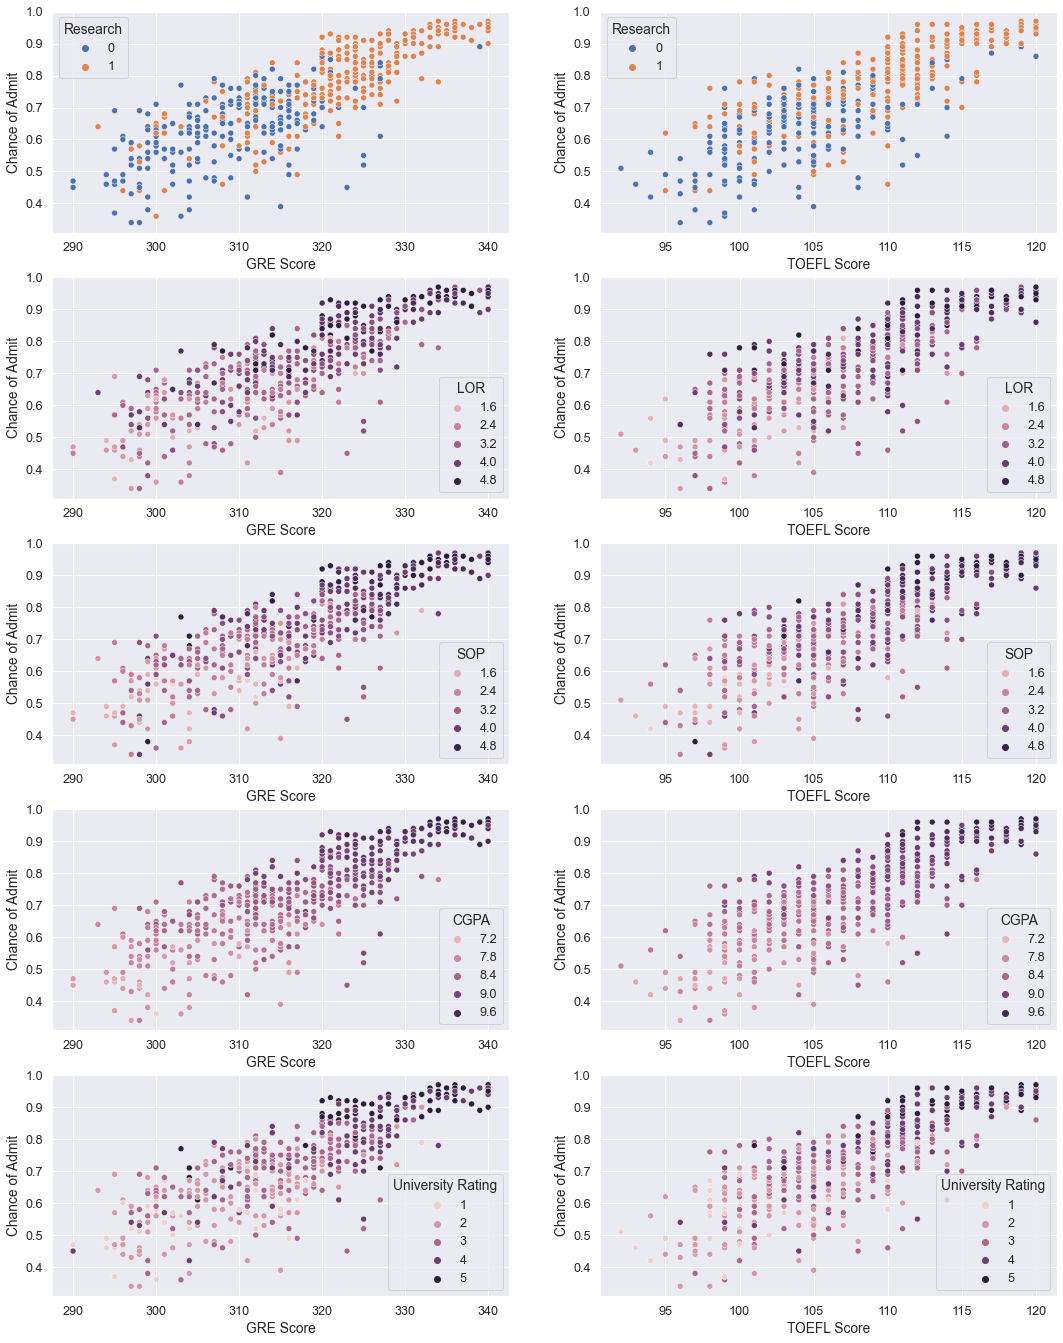

In [94]:
fig, axis = plt.subplots(nrows=5, ncols=2, figsize=(18, 14))
fig.subplots_adjust(top=1.4)

sns.scatterplot(x='GRE Score', y='Chance of Admit', hue='Research', data=df, ax=axis[0,0])
sns.scatterplot(x='TOEFL Score', y='Chance of Admit',hue='Research', data=df, ax=axis[0,1])
sns.scatterplot(x='GRE Score', y='Chance of Admit', hue='LOR', data=df, ax=axis[1,0])
sns.scatterplot(x='TOEFL Score', y='Chance of Admit',hue='LOR', data=df, ax=axis[1,1])
sns.scatterplot(x='GRE Score', y='Chance of Admit', hue='SOP', data=df, ax=axis[2,0])
sns.scatterplot(x='TOEFL Score', y='Chance of Admit',hue='SOP', data=df, ax=axis[2,1])
sns.scatterplot(x='GRE Score', y='Chance of Admit', hue='CGPA', data=df, ax=axis[3,0])
sns.scatterplot(x='TOEFL Score', y='Chance of Admit',hue='CGPA', data=df, ax=axis[3,1])
sns.scatterplot(x='GRE Score', y='Chance of Admit', hue='University Rating', data=df, ax=axis[4,0])
sns.scatterplot(x='TOEFL Score', y='Chance of Admit',hue='University Rating', data=df, ax=axis[4,1])

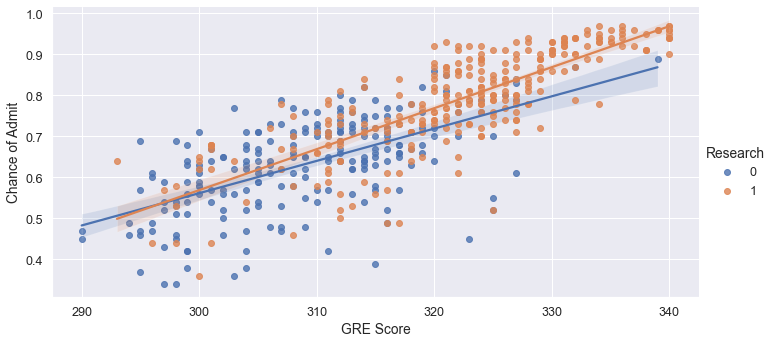

In [103]:
sns.lmplot(x='GRE Score', y='Chance of Admit', hue='Research', data=df,fit_reg=True,aspect=2)

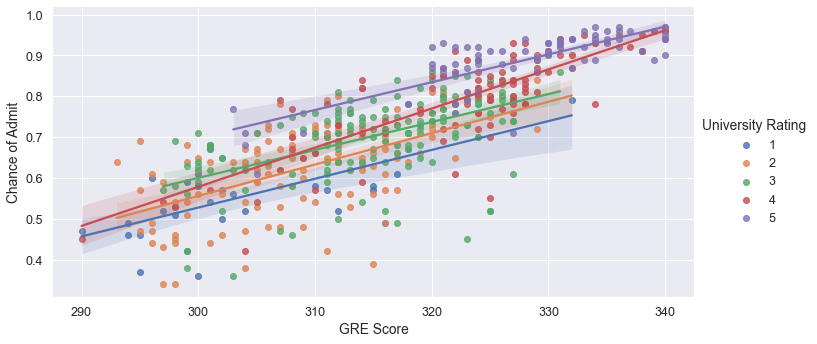

In [104]:
sns.lmplot(x="GRE Score", y="Chance of Admit", data=df, hue="University Rating",fit_reg=True,aspect=2)

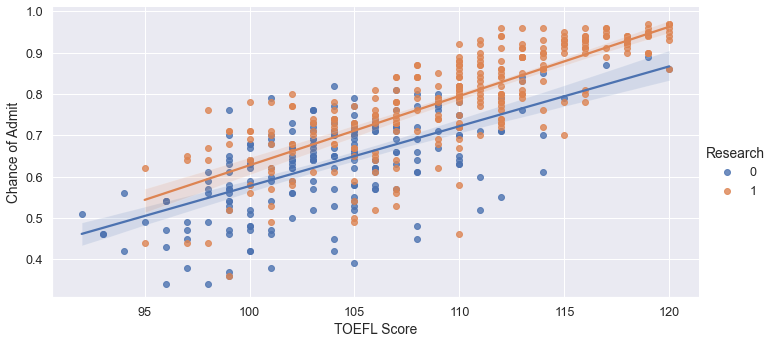

In [105]:
sns.lmplot(x='TOEFL Score', y='Chance of Admit', hue='Research', data=df,fit_reg=True,aspect=2)

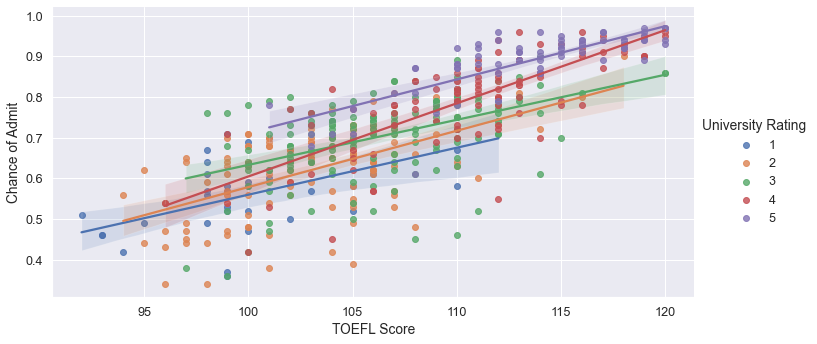

In [106]:
sns.lmplot(x="TOEFL Score", y="Chance of Admit", data=df, hue="University Rating",fit_reg=True,aspect=2)

# Observations:

* It is clear that students having research experience usually have better GRE and TOEFL scores and better chances of Admit.
* Students having higher GRE scores (>320) and higher TOEFL scores(>110) usually have high chance of admit into university of higher ratings (4/5).
* Lower GRE score and low TOEFL score have lower chance of admit, that too for universities of low ratings.
* Students having higher chance of admit, all have good GRE scores and TOEFL and University ratings of 4 or 5.
* same like GRE score , TOEFL score is affecting the chance of Admision.

# Linear Regression

In [107]:
targets = df['Chance of Admit']
features = df.drop(columns = {'Chance of Admit'})

In [378]:
# splitting the data into train and test with some test size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2,shuffle=True)

In [379]:
# scaling the X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [386]:
#Building Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#training the Model
model.fit(X_train,y_train)

#Predicting with X_test values
y_pred = model.predict(X_test)

#R-squared score(coefficient of Determination)
r2=model.score(X_train, y_train)

print(f'Coefficients: {list(zip(features, model.coef_))}')
print(f'Intercept: {model.intercept_}')
print(f'R^2 score: {r2}')

Coefficients: [('GRE Score', 0.021218976363103374), ('TOEFL Score', 0.01777954126561445), ('University Rating', 0.007882702382241764), ('SOP', 0.0032224884732119166), ('LOR', 0.014297683856332082), ('CGPA', 0.07029099890956028), ('Research', 0.012279989294678242)]
Intercept: 0.7234750000000001
R^2 score: 0.8340931382528609


* Trained a model with keeping all columns as features and buils a model
* In this model we may have multicolinearity which need to be removed by VIF method.
* let's perform VIF and check other assumptions of linear regression

# 
# Assumptions of Linear Regression


#  1.Multicollinearity check by VIF score 

* If Features has multicollinearity it may effect the ML model so by checking VIF and remove dependent features.

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif

In [124]:
compute_vif(features.columns).sort_values('VIF', ascending=False)

,Variable,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
5,CGPA,950.817985
3,SOP,35.265006
4,LOR,30.911476
2,University Rating,20.933361
6,Research,2.869493



* we can see vif of GRE score and TOEFL score are very high implies there is multicolinearity
* so we have to drop either Toefl score of GRE score to check further
* For now we will drop TOEFL score and check VIF 

In [130]:
req_features=list(features.columns)

In [132]:
req_features.remove('TOEFL Score')

In [133]:
compute_vif(req_features).sort_values('VIF', ascending=False)

,Variable,VIF
4,CGPA,870.114787
0,GRE Score,688.202779
2,SOP,34.889209
3,LOR,30.911211
1,University Rating,20.714403
5,Research,2.866879


* Now VIF for CGPA is also high let's remove it and check VIF further

In [135]:
req_features.remove('CGPA')

In [136]:
compute_vif(req_features).sort_values('VIF', ascending=False)

,Variable,VIF
2,SOP,32.836036
3,LOR,29.417321
0,GRE Score,19.853847
1,University Rating,19.716492
4,Research,2.849524


* Now SOP's VIF is high let's remove it and check VIF 

In [137]:
req_features.remove('SOP')

In [138]:
compute_vif(req_features).sort_values('VIF', ascending=False)

,Variable,VIF
2,LOR,25.273103
0,GRE Score,18.118115
1,University Rating,14.703903
3,Research,2.825253


* Now VIF of LOR is high let's remove and check VIF  

In [139]:
req_features.remove('LOR')

In [140]:
compute_vif(req_features).sort_values('VIF', ascending=False)

,Variable,VIF
1,University Rating,11.133690
0,GRE Score,9.524547
2,Research,2.780460


* Now University Rating has more VIF let's remove it and further check VIF

In [141]:
req_features.remove('University Rating')

In [142]:
compute_vif(req_features).sort_values('VIF', ascending=False)

,Variable,VIF
0,GRE Score,2.377465
1,Research,2.377465


* Now VIF score is less than 5 means we can continue only with these columns further for ML Model.

# Model building

In [182]:
X=df[req_features]
Y= df['Chance of Admit']

In [239]:
# splitting the data into train and test with some test size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True)

In [240]:
# scaling the X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [262]:
#Building Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#training the Model
model.fit(X_train,y_train)

#Predicting with X_test values
y_pred = model.predict(X_test)

#R-squared score(coefficient of Determination)
r2=model.score(X_train, y_train)

print(f'Coefficients: {list(zip(X, model.coef_))}')
print(f'Intercept: {model.intercept_}')
print(f'R^2 score: {r2}')

Coefficients: [('GRE Score', 0.10406877886620787), ('Research', 0.01678565537710762)]
Intercept: 0.7258499999999999
R^2 score: 0.6751619524349755


In [242]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred}).head()

,Actual,Predict
281,0.80,0.761129
433,0.71,0.717858
440,0.53,0.611460
27,0.44,0.577350
38,0.52,0.601787


In [263]:
#Building Lasso and ridge Regression
from sklearn import linear_model

regressor_lasso = linear_model.Lasso(alpha = 1)
regrssor_ridge = linear_model.Ridge(alpha = 1)

#training the Model
regressor_lasso.fit(X_train,y_train)
regrssor_ridge.fit(X_train,y_train)

print('Lasso Regression:')
print(f'Coefficients: {list(zip(X, regressor_lasso.coef_))}')
print(f'Intercept: {regressor_lasso.intercept_}')
print(f'R^2 score: {regressor_lasso.score(X_train, y_train)}')

print('Ridge Regression:')
print(f'Coefficients: {list(zip(X, regrssor_ridge.coef_))}')
print(f'Intercept: {regrssor_ridge.intercept_}')
print(f'R^2 score: {regrssor_ridge.score(X_train, y_train)}')

Lasso Regression:
Coefficients: [('GRE Score', 0.0), ('Research', 0.0)]
Intercept: 0.7258500000000001
R^2 score: 0.0
Ridge Regression:
Coefficients: [('GRE Score', 0.10372996324776684), ('Research', 0.01692996359571902)]
Intercept: 0.7258499999999999
R^2 score: 0.6751577183245092


In [273]:
#Model Evaluation
from sklearn import metrics


#calculating MAE
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
#calculating MSE
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
#calculating RMSE
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#calculating Adjusted R-squared score
n=X.shape[0]
p=X.shape[1]
adjr2=1-(1-r2)*(n-1)/(n-p-1)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Ajusted R^2:',adjr2)

Mean Absolute Error: 0.0657436617381118
Mean Square Error: 0.008259649201514653
Root Mean Square Error: 0.0908826122067068
Ajusted R^2: 0.6738547570725408


In [ ]:
y_test=y_test.to_numpy()
y_pred=y_pred.to_numpy()

Text(0, 0.5, 'Chance of Admit')

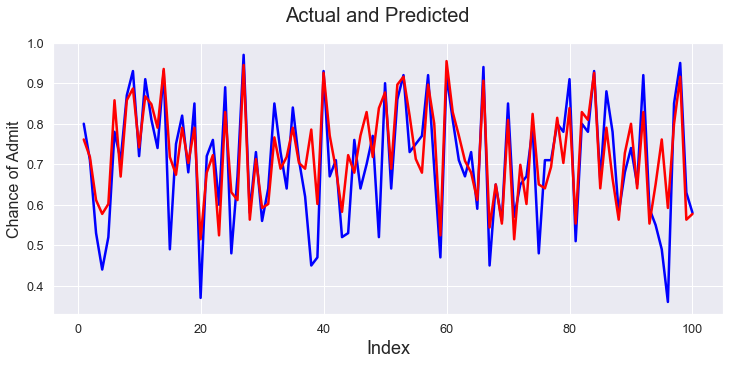

In [377]:
#Actual vs Predicted
c = [i for i in range(1,101,1)]
fig = plt.figure(figsize=(12, 5))
plt.plot(c,y_test.reshape(-1,1), color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred.reshape(-1,1), color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Chance of Admit', fontsize=16)    

Text(0, 0.5, 'ytest-ypred')

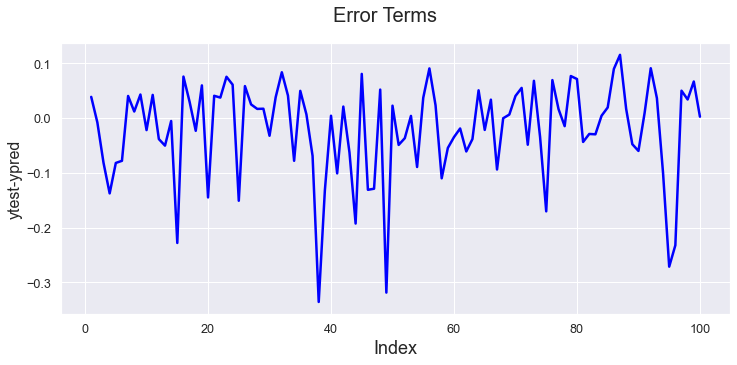

In [375]:
# Error terms
c = [i for i in range(1,101,1)]
fig = plt.figure(figsize=(12, 5))
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

# Observations:

* R^2 metric is high and RMSE is low which means this model can be considered as best
* Actual vs predicted plot shows that this model can be considered as best model because almost most of the time plots are close.
* No need of further changes in this model

# The mean of residuals and residual plot

In [282]:
residual=y_test - y_pred
np.mean(residual)

-0.020550000000000058

eval_env: 1


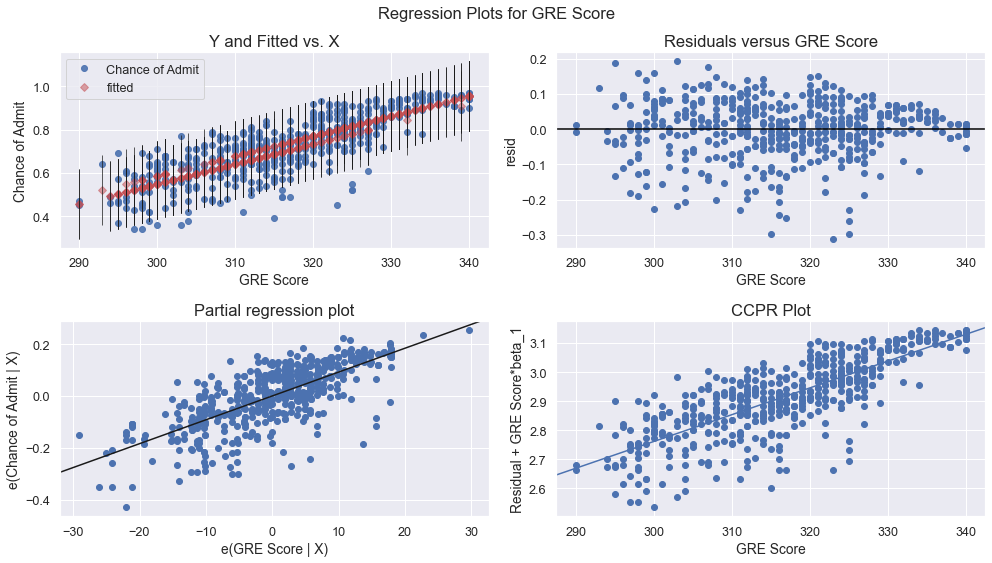

In [292]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
model = sm.OLS(Y,X_constant).fit()
model.summary()
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(model,'GRE Score',fig=fig)

# Test for Homoscedasticity

In [306]:
df11=pd.DataFrame({"residual": residual, "Predict": y_pred})
df11

,residual,Predict
281,0.038871,0.761129
433,-0.007858,0.717858
440,-0.081460,0.611460
27,-0.137350,0.577350
38,-0.081787,0.601787
...,...,...
94,-0.232115,0.592115
217,0.050181,0.799819
399,0.034110,0.915890
353,0.066903,0.563097


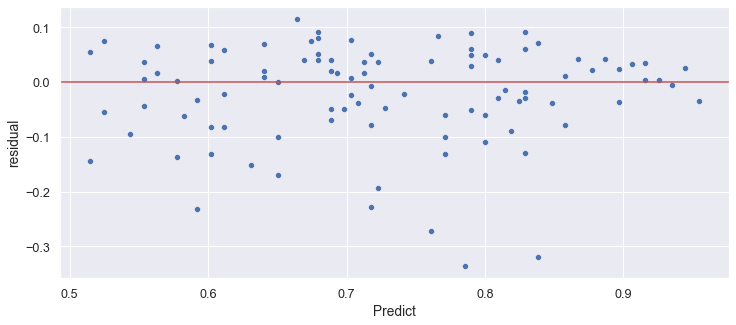

In [324]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Predict', y='residual',data=df11)
plt.axhline(y = 0, color = 'r', linestyle = '-')

Text(0.5, 1.0, 'Residuals vs Predict')

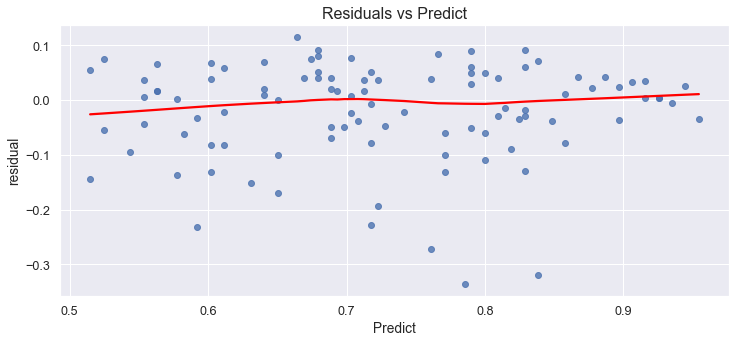

In [333]:
plt.figure(figsize=(12, 5))
sns.regplot(x='Predict', y='residual', lowess=True,data=df11, 
            line_kws={'color': 'red'}).set_title('Residuals vs Predict', fontsize=16)


# Normality of residuals

Text(0.5, 1.0, 'QQ Plot for residual')

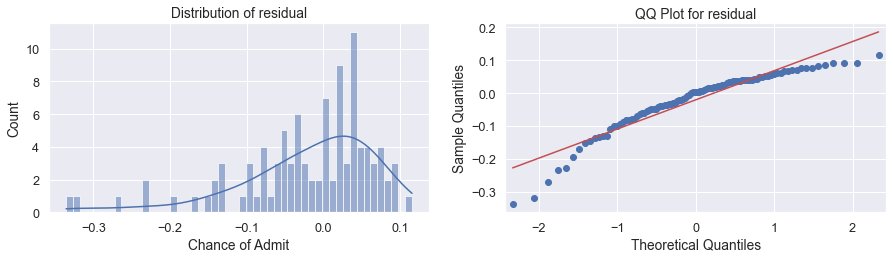

In [344]:

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
fig.subplots_adjust(top=1)

# total_time_data
sns.histplot(data=residual,bins=50,kde=True,
             ax=axis[0]).set_title('Distribution of residual')
sm.qqplot(residual, line = 's',ax=axis[1])
axis[1].set_title('QQ Plot for residual')

# Observations:

* we can see that there is multicolinearity among the features.
* Using VIF method removed the multicolinearity from the features and found that only gre score and Research.
* Mean of Residual is close to zero and by seeing the residual plot no pattern is found.
* Homoscedasticity is not seen as we can there is no much variance as we increase y_pred
* The plot of residuals almost follows Gaussian distribution with some extreme values.

# Actionable Insights:

* There are no Missing Values in given data.
* Types of Variables:
    * Numerical: GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
* total of 5 unique ratings are present in provided data.
* No Outliers are present in provided Data.
* According to plots we can say that average GRE score of a candiate is around 315-320.
* According to plots we can say that average TOEFL score of a candiate is around 105-110.
* Average Chance of Admission is around 70%.
* If SOP,LOR,GRE and TOEFL score is high then chance of admit is very high.
* If a candiate has research work then chance of Admission is also high.
* seems like high university rating has high chance of admission.
* GRE score,TOEFL score,CGPA and chance of Admit is highly correlated.
* It is clear that students having research experience usually have better GRE and TOEFL scores and better chances of Admit.
* Students having higher GRE scores (>320) and higher TOEFL scores(>110) usually have high chance of admit into university of higher ratings (4/5).
* Lower GRE score and low TOEFL score have lower chance of admit, that too for universities of low ratings.
* Students having higher chance of admit, all have good GRE scores and TOEFL and University ratings of 4 or 5.
* same like GRE score , TOEFL score is affecting the chance of Admision.
* R^2 metric(0.67) is high and RMSE(0.09) is low which means this model can be considered as best
* Actual vs predicted plot shows that this model can be considered as best model because almost most of the time plots are close.
* No need of further changes in this model as mean of residual is close to zero(-0.02)
* we can see that there is multicolinearity among the features.
* Using VIF method removed the multicolinearity from the features and found that only gre score and Research.
* Mean of Residual is close to zero and by seeing the residual plot no pattern is found.
* Homoscedasticity is not seen as we can there is no much variance as we increase y_pred
* The plot of residuals almost follows Gaussian distribution with some extreme values.

# Recommendations:

* Candiate with High cgpa likely to score more in GRE and Toef1.
* Research is playing vital role in admission of candiates.
* Candiates with high GRE,Toefl score along with research are likely to get admission in TOP Tier colleges.
* SOP and LOR are also required for TOP Tier colleges but not as much as GRE,TOEFL and CGPA. so consider SOP and LOR as Secondary Requirements.